In [1]:
from IPython.display import Image

# Projeto Final - Disciplina de Mineração da Dados
# Autoencoder vs Filter Methods vs  Wrapper Methods
# Aluno: José Luiz Vilas Boas
# Professor: Dr. Danilo Sipoli Sanches

### Artigo: Prediction and prioritization of autism-associated long non-coding RNAs using gene expression and sequence features.
### Autores: Wang, Jun e Wang, Liangjiang.

## Objetivos do trabalho dos autores:
- Indentificar genes canditados ao Autism spectrum disorders (ASD);
- Desenvolveram um modelo de máquina machine learning para previsão e priorização de lncRNAs candidatos           associados a ASD;
- Redução da dimensionalidade.

# Autoencoders
- "Autoencoder é um tipo de rede neural que pode ser usada para aprender uma representação compactada de dados brutos" [1];
- "É um método de aprendizagem não supervisionado, embora, tecnicamente, sejam treinados por meio de métodos de aprendizagem supervisionados, denominados de auto-supervisão" [1].

## Comando  para deixar iopub.data_rate maior que o padrão:
### 1 - Abra um jupyter notebook com o comando abaixo: 
### jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

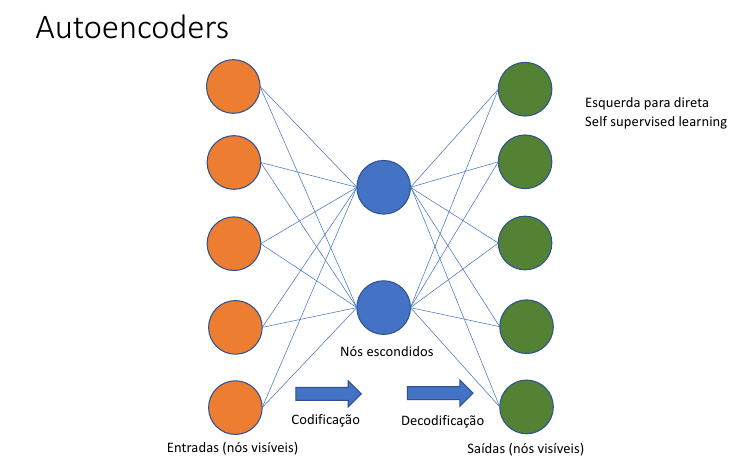

In [2]:
Image(filename='autoencoder.png')

# Materiais e ferramantas utilizadas
- Sequencias de lncRNA e RNA transcritos de humanos do reposítório GENCODE: https://www.gencodegenes.org/;
- MathFeature e IFeature para Feature extraction;
- Seqkit para algumas funções de pré-processamento;
- Máquinas preditivas: Regressão Logística  Random Forest para construção do modelo.

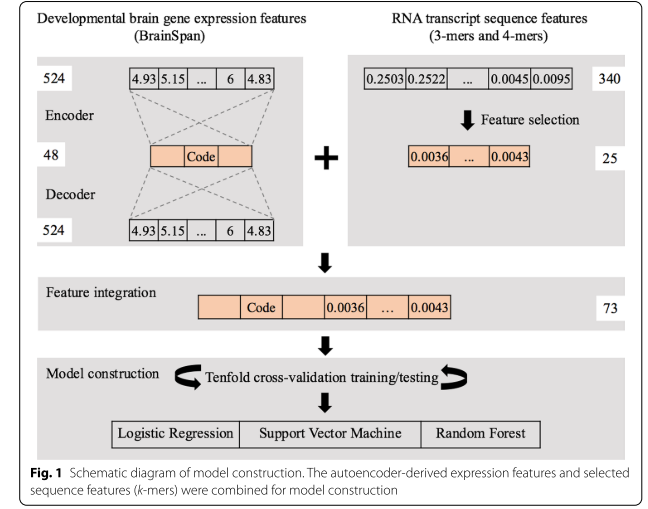

In [4]:
Image(filename='metodologia.png')

## Pré-processamento

### Contando as sequências. Vou usar o software  seqkit

In [ ]:
#lncRNA
!grep ">" basesHumano/gencode.v38.lncRNA_transcripts.fasta | wc -l

In [ ]:
#RNA Transcritos
!grep ">" basesHumano/gencode.v38.pc_transcripts.fasta | wc -l

### Removendo os ruídos e dados duplicados

In [ ]:
#lncRNA
!seqkit rmdup -s < basesHumano/gencode.v38.lncRNA_transcripts.fasta > basesHumano/lncrna_noduplicado.fasta

In [ ]:
#RNA Transcritos
!seqkit rmdup -s < basesHumano/gencode.v38.pc_transcripts.fasta > basesHumano/rna_trancr_noduplicado.fasta

## Usando as funções de pré-processamento do MathFeature

### Eliminando ruídos como outras anotações(letras): k,N...

In [ ]:
#lncRNA
!python3 MathFeature/preprocessing/preprocessing.py -i basesHumano/lncrna_noduplicado.fasta -o basesHumano/lncrna_pre.fasta

In [ ]:
#RNA Transcritos
!python3 MathFeature/preprocessing/preprocessing.py -i basesHumano/rna_trancr_noduplicado.fasta -o basesHumano/rna_pre.fasta

### Recontanto as sequências

In [ ]:
#lncRNA
!grep ">" basesHumano/lncrna_pre.fasta | wc -l

In [ ]:
#mRNA Transcritos
!grep ">" basesHumano/rna_pre.fasta | wc -l

### Executando o sampling para deixa tudo igual

In [ ]:
#lncRNA
%run MathFeature/preprocessing/sampling.py -i basesHumano/rna_pre.fasta -o basesHumano/rna_presampling.fasta -p 97302

### Recontanto as sequências

In [ ]:
#lncRNA
!grep ">" basesHumano/lncrna_pre.fasta | wc -l

In [ ]:
#mRNA Transcritos
!grep ">" basesHumano/rna_presampling.fasta | wc -l

## Extração de características

### OPEN READING FRAME (ORF) DESCRIPTOR

In [ ]:
#lncRNA
%run MathFeature/methods/CodingClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/ORF_lncrna.csv -l lncRNA

In [ ]:
#mRNA
%run MathFeature/methods/CodingClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/ORF_mrna.csv -l mRNA

### Fickett score

In [ ]:
#lncRNA
%run MathFeature/methods/FickettScore.py -i basesHumano/lncrna_pre.fasta -o basesHumano/FICKETT_lncrna.csv -l lncRNA -seq 1

In [ ]:
#mRNA
%run MathFeature/methods/FickettScore.py -i basesHumano/rna_presampling.fasta -o basesHumano/FICKETT_mrna.csv -l mRNA -seq 1

### Numerical Mapping and Fourier Transform

In [ ]:
#lncRNA
%run MathFeature/methods/FourierClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/FOURIER_lncrna.csv -l lncRNA -r 2

In [ ]:
#mRNA
%run MathFeature/methods/FourierClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/FOURIER_mrna.csv -l mRNA -r 2

### Complex Networks -  desabilitei, pois está demorando mais de um dia para processar.

In [ ]:
#lncRNA
#%run MathFeature/methods/ComplexNetworksClass.py -i basesHumano/lncrna_pre.fasta -o basesHumano/CN_lncrna.csv -l lncRNA -k 3 -t 5

In [ ]:
#mRNA
#%run MathFeature/methods/ComplexNetworksClass.py -i basesHumano/rna_presampling.fasta -o basesHumano/CN_mrna.csv -l mRNA -k 3 -t 5

### Extração de características com o iFeature

In [ ]:
!python iFeature/iFeature.py --file basesHumano/lncrna_pre.fasta --type AAC

In [ ]:
!python iFeature/iFeature.py --file basesHumano/rna_presampling.fasta --type AAC

In [ ]:
import pandas as pd

In [ ]:
dflncRNA = pd.read_csv('basesHumano/AAC_mod_lncRNA.csv',sep=',')

In [ ]:
dflncRNA.head()

In [ ]:
dflncRNA['label'] = 'lncRNA'

In [ ]:
display(dflncRNA)

In [ ]:
dflncRNA.to_csv('AAC_lncRNA.csv',index=False,sep=',')

In [ ]:
dfmRNA = pd.read_csv('basesHumano/AAC_mod_mRNA.csv',sep=',')

In [ ]:
display(dfmRNA)

In [ ]:
dfmRNA['label'] = 'mRNA'

In [ ]:
display(dfmRNA)

In [ ]:
dfmRNA.to_csv('AAC_mRNA.csv',index=False,sep=',')

### Concatenando os datasets - iFeature + MathFeature (AAC + FOURIER + ORF)

In [ ]:
%run MathFeature/preprocessing/concatenate.py -n 3 -o basesHumano/lncRNA.csv

In [ ]:
%run MathFeature/preprocessing/concatenate.py -n 3 -o basesHumano/mRNA.csv

## Divisão em treino e teste

In [91]:
#importando as bibliotecas
import os 
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc,r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from imblearn.metrics import specificity_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#Função para dividir em treino e teste
def split(finput, test_rate):
    dataset = pandas.read_csv(finput)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_rate)
    train = pandas.concat([X_train, y_train], axis=1)
    test = pandas.concat([X_test, y_test], axis=1)
    
    trainData = os.path.splitext(finput)[0]+"_train"+os.path.splitext(finput)[1]
    testData = os.path.splitext(finput)[0]+"_test"+os.path.splitext(finput)[1]
    train.to_csv(trainData, index=False)
    test.to_csv(testData, index=False)    
    return          

In [ ]:
# Aplica a divisão treino e teste nas bases mRNA e lncRNA
split('basesHumano/mRNA.csv',0.3)
split('basesHumano/lncRNA.csv',0.3)

In [183]:
# carrega a base de dados treino lncRNA e mRNA
lncRNA_data = pandas.read_csv('basesHumano/lncRNA_train.csv')
mRNA_data = pandas.read_csv('basesHumano/mRNA_train.csv')
dadosTreino = pandas.concat([lncRNA_data,mRNA_data])

## Redução da amostragem em 50%

In [37]:
dadosTreino.shape

(136222, 51)

In [38]:
dadosTreino = dadosTreino.sample(frac = 0.50)

In [185]:
dadosTreino.shape

(136222, 51)

In [184]:
dadosTreino.columns

Index(['nameseq', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum',
       'minimum', 'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [186]:
display(dadosTreino)

,nameseq,A,C,D,E,F,G,H,I,K,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,ENST00000624128.2|ENSG00000203875.13|OTTHUMG00...,0.273009,0.199536,0.0,0.0,0.0,0.278422,0.0,0.0,0.0,...,9,48.826094,53.250000,0.916922,58.823529,11.111111,13.563062,38.250925,0.354581,lncRNA
1,ENST00000657993.1|ENSG00000239523.6|OTTHUMG000...,0.323664,0.206107,0.0,0.0,0.0,0.225954,0.0,0.0,0.0,...,9,54.977814,67.200000,0.818122,44.444444,31.428571,5.450845,38.166056,0.142819,lncRNA
2,ENST00000553454.1|ENSG00000215256.4|OTTHUMG000...,0.239946,0.266086,0.0,0.0,0.0,0.280161,0.0,0.0,0.0,...,9,61.747470,89.500000,0.689916,71.345029,38.095238,9.501427,49.701641,0.191169,lncRNA
3,ENST00000528133.1|ENSG00000254676.1|OTTHUMG000...,0.264088,0.184530,0.0,0.0,0.0,0.205525,0.0,0.0,0.0,...,9,45.753688,48.000000,0.953202,48.387097,22.222222,7.430612,30.658103,0.242370,lncRNA
4,ENST00000669022.1|ENSG00000275830.2|OTTHUMG000...,0.261066,0.239386,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,...,6,34.125650,30.200000,1.129988,63.157895,16.666667,11.432097,40.144412,0.284774,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68106,ENST00000368092.7|ENSG00000162723.10|OTTHUMG00...,0.247350,0.270907,0.0,0.0,0.0,0.253239,0.0,0.0,0.0,...,18,201.868769,149.000000,1.354824,56.000000,38.888889,5.424358,49.936866,0.108624,mRNA
68107,ENST00000253099.11|ENSG00000105364.14|OTTHUMG0...,0.192939,0.330870,0.0,0.0,0.0,0.305419,0.0,0.0,0.0,...,6,374.642830,307.500000,1.218351,65.064103,33.333333,12.481002,54.264172,0.230004,mRNA
68108,ENST00000648544.1|ENSG00000164543.7|OTTHUMG000...,0.296316,0.207688,0.0,0.0,0.0,0.256273,0.0,0.0,0.0,...,6,266.955784,125.368421,2.129370,55.172414,20.833333,7.740153,38.693437,0.200038,mRNA
68109,ENST00000457054.6|ENSG00000170248.15|OTTHUMG00...,0.306105,0.192385,0.0,0.0,0.0,0.200604,0.0,0.0,0.0,...,6,305.954888,85.356164,3.584450,58.333333,13.333333,9.018525,32.991789,0.273357,mRNA


In [187]:
#Remove column nameseq
dadosTreino.drop(columns='nameseq', inplace=True)

In [188]:
#Vamos verificar
dadosTreino.columns

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [44]:
#Verificar valores nulos
dadosTreino.isnull().sum()

A                                0
C                                0
D                                0
E                                0
F                                0
G                                0
H                                0
I                                0
K                                0
L                                0
M                                0
N                                0
P                                0
Q                                0
R                                0
S                                0
T                                0
V                                0
W                                0
Y                                0
average                          0
median                           0
maximum                          0
minimum                          0
peak                             0
none_levated_peak                0
sample_standard_deviation        0
population_standard_deviation    0
percentile15        

In [189]:
#Fazendo uma cópia dos dados
dadosTreinoAux = dadosTreino.copy()

In [190]:
display(dadosTreino)

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,0.273009,0.199536,0.0,0.0,0.0,0.278422,0.0,0.0,0.0,0.0,...,9,48.826094,53.250000,0.916922,58.823529,11.111111,13.563062,38.250925,0.354581,lncRNA
1,0.323664,0.206107,0.0,0.0,0.0,0.225954,0.0,0.0,0.0,0.0,...,9,54.977814,67.200000,0.818122,44.444444,31.428571,5.450845,38.166056,0.142819,lncRNA
2,0.239946,0.266086,0.0,0.0,0.0,0.280161,0.0,0.0,0.0,0.0,...,9,61.747470,89.500000,0.689916,71.345029,38.095238,9.501427,49.701641,0.191169,lncRNA
3,0.264088,0.184530,0.0,0.0,0.0,0.205525,0.0,0.0,0.0,0.0,...,9,45.753688,48.000000,0.953202,48.387097,22.222222,7.430612,30.658103,0.242370,lncRNA
4,0.261066,0.239386,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,...,6,34.125650,30.200000,1.129988,63.157895,16.666667,11.432097,40.144412,0.284774,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68106,0.247350,0.270907,0.0,0.0,0.0,0.253239,0.0,0.0,0.0,0.0,...,18,201.868769,149.000000,1.354824,56.000000,38.888889,5.424358,49.936866,0.108624,mRNA
68107,0.192939,0.330870,0.0,0.0,0.0,0.305419,0.0,0.0,0.0,0.0,...,6,374.642830,307.500000,1.218351,65.064103,33.333333,12.481002,54.264172,0.230004,mRNA
68108,0.296316,0.207688,0.0,0.0,0.0,0.256273,0.0,0.0,0.0,0.0,...,6,266.955784,125.368421,2.129370,55.172414,20.833333,7.740153,38.693437,0.200038,mRNA
68109,0.306105,0.192385,0.0,0.0,0.0,0.200604,0.0,0.0,0.0,0.0,...,6,305.954888,85.356164,3.584450,58.333333,13.333333,9.018525,32.991789,0.273357,mRNA


## Normalização dos dados treino

In [191]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTreino['label'] = dadosTreino['label'].map(dicionario) 

In [192]:
dadosTreino.columns

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')

In [193]:
#dadosTreino.iloc[:,20:49]
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
cols = dadosTreino.iloc[:, 20:49].columns
dadosTreino[cols] = pandas.DataFrame(scaler.fit_transform(dadosTreino.iloc[:, 20:49]), columns=dadosTreino.iloc[:, 20:49].columns)

In [194]:
dadosTreino

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,0.273009,0.199536,0.0,0.0,0.0,0.278422,0.0,0.0,0.0,0.0,...,0.006818,0.015199,0.039227,0.041929,0.641711,0.130952,0.474167,0.450814,0.493489,1
1,0.323664,0.206107,0.0,0.0,0.0,0.225954,0.0,0.0,0.0,0.0,...,0.006818,0.017114,0.049503,0.037411,0.484848,0.370408,0.190562,0.449814,0.198769,1
2,0.239946,0.266086,0.0,0.0,0.0,0.280161,0.0,0.0,0.0,0.0,...,0.006818,0.019222,0.065930,0.031549,0.778309,0.448980,0.332171,0.585769,0.266060,1
3,0.264088,0.184530,0.0,0.0,0.0,0.205525,0.0,0.0,0.0,0.0,...,0.006818,0.014243,0.035359,0.043588,0.527859,0.261905,0.259775,0.361328,0.337319,1
4,0.261066,0.239386,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,...,0.004545,0.010623,0.022247,0.051673,0.688995,0.196429,0.399668,0.473131,0.396335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68106,0.247350,0.270907,0.0,0.0,0.0,0.253239,0.0,0.0,0.0,0.0,...,0.006818,0.010758,0.032747,0.035548,0.648221,0.235714,0.372699,0.521885,0.335064,0
68107,0.192939,0.330870,0.0,0.0,0.0,0.305419,0.0,0.0,0.0,0.0,...,0.006818,0.011110,0.038999,0.030827,0.539589,0.245536,0.273451,0.420313,0.305247,0
68108,0.296316,0.207688,0.0,0.0,0.0,0.256273,0.0,0.0,0.0,0.0,...,0.004545,0.010693,0.033763,0.034270,0.631579,0.196429,0.441372,0.413964,0.500249,0
68109,0.306105,0.192385,0.0,0.0,0.0,0.200604,0.0,0.0,0.0,0.0,...,0.006818,0.006282,0.018785,0.036189,0.606061,0.471429,0.194890,0.571280,0.160061,0


In [195]:
#Divide a base entre os previsores e classe
colunas = dadosTreino.columns.drop('label')

In [196]:
# Gera os previsores e classe (X e y)
X = dadosTreino[colunas].values
y = dadosTreino['label']

## Dados de Teste

In [202]:
# carrega a base de dados teste lncRNA e mRNA
lncRNA_data_t = pandas.read_csv('basesHumano/lncRNA_test.csv')
mRNA_data_t = pandas.read_csv('basesHumano/mRNA_test.csv')
dadosTeste = pandas.concat([lncRNA_data_t,mRNA_data_t])

In [203]:
dadosTeste

,nameseq,A,C,D,E,F,G,H,I,K,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,ENST00000662662.1|ENSG00000255760.2|OTTHUMG000...,0.304718,0.249807,0.0,0.0,0.0,0.228925,0.0,0.0,0.0,...,18,81.694553,83.000000,0.984272,62.500000,38.888889,6.006221,48.185650,0.124648,lncRNA
1,ENST00000670263.1|ENSG00000241472.7|OTTHUMG000...,0.296918,0.209130,0.0,0.0,0.0,0.196254,0.0,0.0,0.0,...,6,48.063540,47.581395,1.010133,57.692308,8.333333,11.198298,37.150870,0.301428,lncRNA
2,ENST00000414989.2|ENSG00000224192.2|OTTHUMG000...,0.228037,0.261682,0.0,0.0,0.0,0.241121,0.0,0.0,0.0,...,6,41.173224,54.375000,0.757209,58.333333,33.333333,7.625398,46.705952,0.163264,lncRNA
3,ENST00000656534.1|ENSG00000226995.9|OTTHUMG000...,0.239715,0.257120,0.0,0.0,0.0,0.265823,0.0,0.0,0.0,...,6,69.193641,67.800000,1.020555,60.000000,26.666667,9.253747,49.838720,0.185674,lncRNA
4,ENST00000656913.1|ENSG00000267712.6|OTTHUMG000...,0.319322,0.205144,0.0,0.0,0.0,0.216437,0.0,0.0,0.0,...,6,58.135080,69.750000,0.833478,61.538462,25.000000,7.593501,40.751077,0.186339,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,ENST00000503281.6|ENSG00000164904.18|OTTHUMG00...,0.260406,0.214514,0.0,0.0,0.0,0.289221,0.0,0.0,0.0,...,9,21.330729,31.000000,0.688088,60.416667,22.222222,9.840077,46.713802,0.210646,mRNA
29187,ENST00000303645.10|ENSG00000170262.13|OTTHUMG0...,0.237634,0.310753,0.0,0.0,0.0,0.253763,0.0,0.0,0.0,...,6,162.172244,135.857143,1.193697,64.341085,33.333333,10.030041,51.329949,0.195403,mRNA
29188,ENST00000526322.5|ENSG00000149294.17|OTTHUMG00...,0.257143,0.269048,0.0,0.0,0.0,0.239683,0.0,0.0,0.0,...,21,166.349662,149.700000,1.111220,60.185185,38.461538,7.148636,50.235307,0.142303,mRNA
29189,ENST00000586262.5|ENSG00000091164.13|OTTHUMG00...,0.303869,0.166902,0.0,0.0,0.0,0.181870,0.0,0.0,0.0,...,6,118.819495,65.265306,1.820561,47.222222,8.333333,8.372529,32.985070,0.253828,mRNA


## Redução da amostragem em 50%

In [55]:
dadosTeste.shape

(58382, 51)

In [56]:
dadosTeste = dadosTeste.sample(frac = 0.50)

In [199]:
dadosTeste.shape

(58382, 51)

In [204]:
#Remove column nameseq
dadosTeste.drop(columns='nameseq', inplace=True)

In [205]:
dadosTeste.shape

(58382, 50)

In [206]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTeste['label'] = dadosTeste['label'].map(dicionario) 

In [207]:
dadosTeste

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,0.304718,0.249807,0.0,0.0,0.0,0.228925,0.0,0.0,0.0,0.0,...,18,81.694553,83.000000,0.984272,62.500000,38.888889,6.006221,48.185650,0.124648,1
1,0.296918,0.209130,0.0,0.0,0.0,0.196254,0.0,0.0,0.0,0.0,...,6,48.063540,47.581395,1.010133,57.692308,8.333333,11.198298,37.150870,0.301428,1
2,0.228037,0.261682,0.0,0.0,0.0,0.241121,0.0,0.0,0.0,0.0,...,6,41.173224,54.375000,0.757209,58.333333,33.333333,7.625398,46.705952,0.163264,1
3,0.239715,0.257120,0.0,0.0,0.0,0.265823,0.0,0.0,0.0,0.0,...,6,69.193641,67.800000,1.020555,60.000000,26.666667,9.253747,49.838720,0.185674,1
4,0.319322,0.205144,0.0,0.0,0.0,0.216437,0.0,0.0,0.0,0.0,...,6,58.135080,69.750000,0.833478,61.538462,25.000000,7.593501,40.751077,0.186339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,0.260406,0.214514,0.0,0.0,0.0,0.289221,0.0,0.0,0.0,0.0,...,9,21.330729,31.000000,0.688088,60.416667,22.222222,9.840077,46.713802,0.210646,0
29187,0.237634,0.310753,0.0,0.0,0.0,0.253763,0.0,0.0,0.0,0.0,...,6,162.172244,135.857143,1.193697,64.341085,33.333333,10.030041,51.329949,0.195403,0
29188,0.257143,0.269048,0.0,0.0,0.0,0.239683,0.0,0.0,0.0,0.0,...,21,166.349662,149.700000,1.111220,60.185185,38.461538,7.148636,50.235307,0.142303,0
29189,0.303869,0.166902,0.0,0.0,0.0,0.181870,0.0,0.0,0.0,0.0,...,6,118.819495,65.265306,1.820561,47.222222,8.333333,8.372529,32.985070,0.253828,0


## Normalização dos dados Teste

In [208]:
scaler_t = MinMaxScaler()
# fit and transform the data
cols = dadosTeste.iloc[:, 20:49].columns
dadosTeste[cols] = pandas.DataFrame(scaler_t.fit_transform(dadosTeste.iloc[:, 20:49]), columns=dadosTeste.iloc[:, 20:49].columns)

In [209]:
dadosTeste

,A,C,D,E,F,G,H,I,K,L,...,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,label
0,0.304718,0.249807,0.0,0.0,0.0,0.228925,0.0,0.0,0.0,0.0,...,0.014118,0.025737,0.065098,0.045834,0.692935,0.458333,0.201771,0.567902,0.171684,1
1,0.296918,0.209130,0.0,0.0,0.0,0.196254,0.0,0.0,0.0,0.0,...,0.004706,0.015142,0.037319,0.047039,0.639632,0.098214,0.376193,0.437850,0.415174,1
2,0.228037,0.261682,0.0,0.0,0.0,0.241121,0.0,0.0,0.0,0.0,...,0.004706,0.012971,0.042647,0.035261,0.646739,0.392857,0.256166,0.550463,0.224873,1
3,0.239715,0.257120,0.0,0.0,0.0,0.265823,0.0,0.0,0.0,0.0,...,0.004706,0.021799,0.053176,0.047524,0.665217,0.314286,0.310868,0.587385,0.255739,1
4,0.319322,0.205144,0.0,0.0,0.0,0.216437,0.0,0.0,0.0,0.0,...,0.004706,0.018315,0.054706,0.038812,0.682274,0.294643,0.255094,0.480281,0.256655,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,0.260406,0.214514,0.0,0.0,0.0,0.289221,0.0,0.0,0.0,0.0,...,0.004706,0.015951,0.052941,0.034930,0.739130,0.392857,0.432938,0.560395,0.373315,0
29187,0.237634,0.310753,0.0,0.0,0.0,0.253763,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
29188,0.257143,0.269048,0.0,0.0,0.0,0.239683,0.0,0.0,0.0,0.0,...,0.011765,0.017307,0.041569,0.048268,0.471196,0.261905,0.251306,0.397664,0.305374,0
29189,0.303869,0.166902,0.0,0.0,0.0,0.181870,0.0,0.0,0.0,0.0,...,0.004706,0.010174,0.038503,0.030632,0.501553,0.261905,0.203249,0.420243,0.233708,0


In [210]:
# Gera os previsores e classe (X e y)
X_teste = dadosTeste[colunas].values
y_teste = dadosTeste['label']

In [211]:
X_teste.shape

(58382, 49)

In [212]:
print(y_teste)

0        1
1        1
2        1
3        1
4        1
        ..
29186    0
29187    0
29188    0
29189    0
29190    0
Name: label, Length: 58382, dtype: int64


In [213]:
# Exibe a quantidade de atributos
print("Columns size >>> %d"%len(colunas))

# Exibe o nome dos atributos
print(dadosTreino.columns)

Columns size >>> 49
Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'average', 'median', 'maximum', 'minimum',
       'peak', 'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis',
       'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'label'],
      dtype='object')


In [214]:
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(136222, 49) (136222,) (58382, 49) (58382,)


## Aplica o modelo de predição com RandomForest sem o Feature Importance

In [215]:
from sklearn.ensemble import RandomForestClassifier
# instancia um DecisionTreeClassifier
clf_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
# treina o DT
clf_rf.fit(X, y)

y_pred = clf_rf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

69.04


## Aplica o modelo de predição com RandomForest e Wrapper

In [216]:
from sklearn.feature_selection import RFE
clf_rf_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123)      
rfe = RFE(estimator=clf_rf_2,n_features_to_select=24,step=1)
rfe = rfe.fit(X,y)

In [217]:
#Armazena a nova dimensão do vetor de características
features = rfe.fit_transform(X,y)

In [218]:
#Verifica a quantidade
print(features.shape)

(136222, 24)


## Obtendo as melhores features

In [219]:
temp = pandas.Series(rfe.support_,index = colunas)
wrapperApproach = temp[temp==True].index
print(wrapperApproach)

Index(['A', 'C', 'G', 'T', 'minimum', 'peak', 'none_levated_peak',
       'percentile15', 'percentile25', 'percentile50', 'percentile75',
       'interquartile_range', 'coefficient_of_variation', 'skewness',
       'kurtosis', 'maximum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF'],
      dtype='object')


In [220]:
#Predicao sem validação cruzada
y_pred = rfe.predict(X_teste)
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

70.54


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado = cross_val_score(rfe, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Random Forest é:', resultado.mean())

In [ ]:
resultado

In [221]:
rf_pred = rfe.predict(X_teste)

## Calculando as métricas

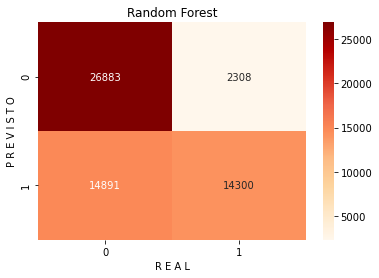

In [222]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_teste, rf_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [223]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf = accuracy_score(y_teste,rf_pred)
especificidade_rf = specificity_score(y_teste,rf_pred)
precisao_rf = precision_score(y_teste,rf_pred)
recall_rf = recall_score(y_teste,y_pred)
f1Score_rf = f1_score(y_teste,rf_pred)
curva_roc_escore_rf = roc_auc_score(y_teste,rf_pred)
kappa_rf = cohen_kappa_score(y_teste,rf_pred)
print(f'Acurácia:{round(acuracia_rf,2)}')
print(f'Especificidade:{round(especificidade_rf,2)}')
print(f'Precisão:{round(precisao_rf,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf,2)}')
print(f'F1-Score:{round(f1Score_rf,2)}')
print(f'Kappa:{round(kappa_rf,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf,2)}')

Acurácia:0.71
Especificidade:0.92
Precisão:0.86
Recall ou Sensibilidade:0.49
F1-Score:0.62
Kappa:0.41
Curva ROC:0.71


## Curva ROC

In [224]:
import matplotlib.pyplot  as pyplot

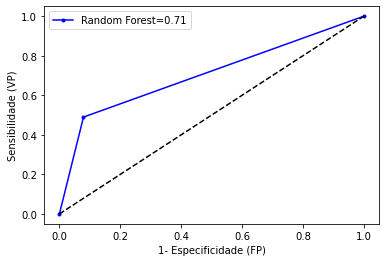

In [225]:
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Feature importance Random Forest + Wrapper

## Aplica o modelo de predição com Regressão Logística e Wrapper

In [226]:
clf_rl = LogisticRegression(max_iter=2000)
rfe_rl = RFE(clf_rl,n_features_to_select=24,step=1)
fit_rl = rfe_rl.fit(X,y)

In [227]:
#Armazena a nova dimensão do vetor de características
features_rl = fit_rl.fit_transform(X,y)

In [228]:
#Verifica a quantidade
print(features_rl.shape)

(136222, 10)


## Exibindo as melhores features

In [229]:
temp_rl = pandas.Series(fit_rl.support_,index = colunas)
wrapperApproach_rl = temp_rl[temp_rl==True].index
print(wrapperApproach_rl)

Index(['A', 'C', 'T', 'none_levated_peak', 'kurtosis',
       'maximum_GC_content_ORF', 'minimum_GC_content_ORF',
       'std_GC_content_ORF', 'average_GC_content_ORF', 'cv_GC_content_ORF'],
      dtype='object')


In [230]:
#Predicao sem validação cruzada
y_pred_rl = fit_rl.predict(X_teste)
acuracidade_rl = round(accuracy_score(y_teste,y_pred_rl)*100,2)
print(acuracidade_rl)

50.11


## Validação cruzada no conjunto reduzido

In [231]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_rl = cross_val_score(fit_rl, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_rl.mean())

In [ ]:
resultado_rl

In [236]:
rl_pred = fit_rl.predict(X_teste)

## Calculando as métricas

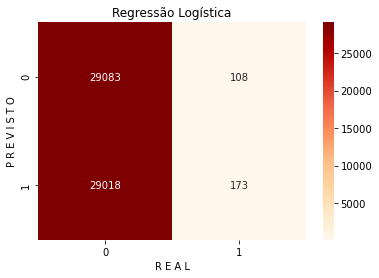

In [237]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rl_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [238]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl = accuracy_score(y_teste,rl_pred)
especificidade_rl = specificity_score(y_teste,rl_pred)
precisao_rl = precision_score(y_teste,rl_pred)
recall_rl = recall_score(y_teste,rl_pred)
f1Score_rl = f1_score(y_teste,rl_pred)
curva_roc_escore_rl = roc_auc_score(y_teste,rl_pred)
kappa_rl = cohen_kappa_score(y_teste,rl_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_rl,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl,2)}')
print(f'F1-Score:{round(f1Score_rl,2)}')
print(f'Kappa:{round(kappa_rl,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl,2)}')

Acurácia:0.5
Especificidade:1.0
Precisão:0.62
Recall ou Sensibilidade:0.01
F1-Score:0.01
Kappa:0.0
Curva ROC:0.5


## Curva ROC

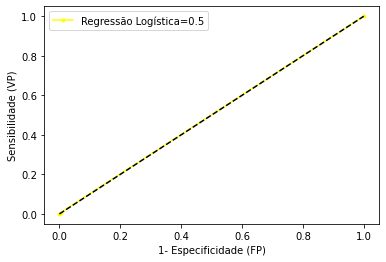

In [239]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
#pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Feature importance Regressão Logística + Wrapper

## Aplica o modelo de predição com SVM e Wrapper

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10, step=0.1)
fit_svm = rfe.fit(x_train,y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
param_grid = {'C':[1e3,5e3,1e4,5e4,1e5],'gama':[0.0001,0.0005,0.001,0.005,0.1]}
svc = SVC()
clf_svm = GridSearchCV(svc, parameters)
#clf_svm = GridSearchCV(SVC(kernel='rbf'),param_grid)
fit_svm = clf_svm.fit(X,y)
#print('Best estimator found by GridSearch')
#print(clf_svm.best_estimator_)
#clf_svm = SVC(gamma='auto')
#rfe_svm = RFE(clf_svm, n_features_to_select=10, step=1)
#fit_svm = rfe_svm.fit(X,y)

In [ ]:
#Armazena a nova dimensão do vetor de características
features_svm = svm.fit_transform(X,y)

In [ ]:
#Verifica a quantidade
print(features_svm.shape)

## Obtendo as melhores feature do modelo

In [ ]:
temp_svm = pandas.Series(fit_svm.support_,index = colunas)
wrapperApproach_svm = temp_svm[temp_svm==True].index
print(wrapperApproach_svm)

In [ ]:
#Predicao sem validação cruzada
y_pred_svm = fit_svm.predict(X_teste)
acuracidade_svm = round(accuracy_score(y_teste,y_pred_svm)*100,2)
print(acuracidade_svm)

## Calculando as métricas

In [ ]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, svm_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm = accuracy_score(y_teste,svm_pred)
especificidade_svm = specificity_score(y_teste,svm_pred)
precisao_svm = precision_score(y_teste,svm_pred)
recall_svm = recall_score(y_teste,svm_pred)
f1Score_svm = f1_score(y_teste,svm_pred)
curva_roc_escore_svm = roc_auc_score(y_teste,svm_pred)
kappa_svm = cohen_kappa_score(y_teste,svm_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_svm,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm,2)}')
print(f'F1-Score:{round(f1Score_svm,2)}')
print(f'Kappa:{round(kappa_svm,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm,2)}')

## Curva ROC

In [ ]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
rfp_svm, rvp_svm,lim3 = roc_curve(y_teste,svm_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,2)),color='red')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com RandomForest e Filtro

In [240]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X, y)

SelectKBest(score_func=<function mutual_info_classif at 0x7f7f9ced10d0>)

In [241]:
# to remove the rest of the features:
X_train_filtro = selector.transform(X)
X_teste_filtro = selector.transform(X_teste)

In [242]:
#Executando o modelo
clf_rf_filtro = RandomForestClassifier(random_state=123)      
clr_rf_filtro = clf_rf_filtro.fit(X_train_filtro,y)

In [243]:
#Predição
rf_pred_filtro = clr_rf_filtro.predict(X_teste_filtro)

## Calculando as métricas

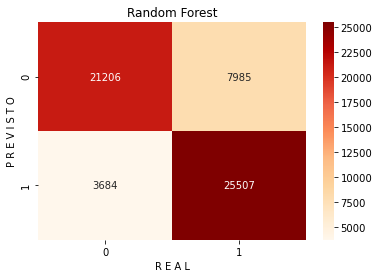

In [244]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rf_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [245]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf_f = accuracy_score(y_teste,rf_pred_filtro)
especificidade_rf_f = specificity_score(y_teste,rf_pred_filtro)
precisao_rf_f = precision_score(y_teste,rf_pred_filtro)
recall_rf_f = recall_score(y_teste,rf_pred_filtro)
f1Score_rf_f = f1_score(y_teste,rf_pred_filtro)
curva_roc_escore_rf_f = roc_auc_score(y_teste,rf_pred_filtro)
kappa_rf_f = cohen_kappa_score(y_teste,rf_pred_filtro)
print(f'Acurácia:{round(acuracia_rf_f,2)}')
print(f'Especificidade:{round(especificidade_rf_f,2)}')
print(f'Precisão:{round(precisao_rf_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf_f,2)}')
print(f'F1-Score:{round(f1Score_rf_f,2)}')
print(f'Kappa:{round(kappa_rf_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf_f,2)}')

Acurácia:0.8
Especificidade:0.73
Precisão:0.76
Recall ou Sensibilidade:0.87
F1-Score:0.81
Kappa:0.6
Curva ROC:0.8


## Feature importance Random Forest + Filter

## Aplica o modelo de predição com Regressão Logística e Filter

In [246]:
#Executando o modelo
clf_rl_filtro = LogisticRegression(max_iter=2000)      
clr_rl_filtro = clf_rf_filtro.fit(X_train_filtro,y)

In [247]:
#Predição
rl_pred_filtro = clr_rl_filtro.predict(X_teste_filtro)

## Calculando as métricas

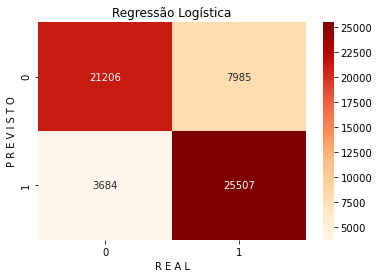

In [248]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rl_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [249]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl_f = accuracy_score(y_teste,rl_pred_filtro)
especificidade_rl_f = specificity_score(y_teste,rl_pred_filtro)
precisao_rl_f = precision_score(y_teste,rl_pred_filtro)
recall_rl_f = recall_score(y_teste,rl_pred_filtro)
f1Score_rl_f = f1_score(y_teste,rl_pred_filtro)
curva_roc_escore_rl_f = roc_auc_score(y_teste,rl_pred_filtro)
kappa_rl_f = cohen_kappa_score(y_teste,rl_pred_filtro)
print(f'Acurácia:{round(acuracia_rl_f,2)}')
print(f'Especificidade:{round(especificidade_rl_f,2)}')
print(f'Precisão:{round(precisao_rf_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl_f,2)}')
print(f'F1-Score:{round(f1Score_rl_f,2)}')
print(f'Kappa:{round(kappa_rl_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl_f,2)}')

Acurácia:0.8
Especificidade:0.73
Precisão:0.76
Recall ou Sensibilidade:0.87
F1-Score:0.81
Kappa:0.6
Curva ROC:0.8


## Aplica o modelo de predição SVM com Hiperparâmetros e Filter

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf_svm_filtro = GridSearchCV(svc, parameters)
clf_svm_filtro = clf_svm_filtro.fit(X_train_filtro,y)

In [ ]:
#Predição
svm_pred_filtro = clf_svm_filtro.predict(X_teste_filtro)

## Calculando as métricas

In [ ]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, svm_pred_filtro), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm_f = accuracy_score(y_teste,svm_pred_filtro)
especificidade_svm_f = specificity_score(y_teste,svm_pred_filtro)
precisao_svm_f = precision_score(y_teste,svm_pred_filtro)
recall_svm_f = recall_score(y_teste,svm_pred_filtro)
f1Score_svm_f = f1_score(y_teste,svm_pred_filtro)
curva_roc_escore_svm_f = roc_auc_score(y_teste,svm_pred_filtro)
kappa_svm_f = cohen_kappa_score(y_teste,svm_pred_filtro)
print(f'Acurácia:{round(acuracia_svm_f,2)}')
print(f'Especificidade:{round(especificidade_svm_f,2)}')
print(f'Precisão:{round(precisao_svm_f,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm_f,2)}')
print(f'F1-Score:{round(f1Score_svm_f,2)}')
print(f'Kappa:{round(kappa_svm_f,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm_f,2)}')

## Curva ROC

In [ ]:
rfp_rl_f, rvp_rl_f,lim4 = roc_curve(y_teste,rl_pred_filtro)
rfp_rf_f, rvp_rf_f,lim5 = roc_curve(y_teste,rf_pred_filtro)
rfp_svm_f,rvp_svm_f,lim6 = roc_curve(y_teste,svm_pred_filtro)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl_f,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf_f,2)),color='blue')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Feature importance Regressão Logística + Filter

# Autoencoders

In [321]:
# Importanfo as bibliotecas
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [322]:
#Verificando X e Y
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(136222, 49) (136222,) (58382, 49) (58382,)


In [323]:
#Pegando os números de input
n_inputs = X.shape[1]
#definindo o encoder
visible = Input(shape=(n_inputs,))

In [324]:
#Encoder nível 1. Definindo a primeira camada oculta
e = Dense(n_inputs*2)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [325]:
# Encoder nível 2. Definindo a segunda camada oculta
e = Dense(n_inputs)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [326]:
#Camada de redução. aqui que acontece a redução
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 24
bottleneck = Dense(n_bottleneck)(e)

In [327]:
#Definindo o decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [328]:
#Definindo o decoder nível 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [329]:
#Camada de saída usando a função de ativação
#É a função mais básica porque não altera a saída de um neurônio
output = Dense(n_inputs, activation='linear')(d)

In [330]:
#definindo o modelo de autoencoder model
model = Model(inputs=visible, outputs=output)

In [331]:
#Compilando o modelo autoencoder
#adam =  função com base no método de descida gradiente estocástico. Tende a convergir rapidamente.
#binary_crossentropy  = um função utilizada para problemas de classificação binária (0 ou 1)
# mse = calcula a média dos quadrados dos erros entre rótulos e previsões
#model.compile(optimizer='adam', loss='binary_crossentropy')
model.compile(optimizer='adam', loss='mse')

In [332]:
#Ajustar o modelo autoencoder para reconstruir a entrada 
history = model.fit(X,X, epochs=500, batch_size=16, verbose=2, validation_data=(X_teste,X_teste))

Epoch 1/500
8514/8514 - 22s - loss: 6.0376 - val_loss: 41.3112
Epoch 2/500
8514/8514 - 19s - loss: 1.5697 - val_loss: 43.7515
Epoch 3/500
8514/8514 - 20s - loss: 1.2449 - val_loss: 33.0154
Epoch 4/500
8514/8514 - 19s - loss: 1.2969 - val_loss: 15.5176
Epoch 5/500
8514/8514 - 18s - loss: 1.1963 - val_loss: 42.2001
Epoch 6/500
8514/8514 - 18s - loss: 1.1094 - val_loss: 24.2880
Epoch 7/500
8514/8514 - 18s - loss: 0.9218 - val_loss: 62.7018
Epoch 8/500
8514/8514 - 18s - loss: 0.9379 - val_loss: 43.3158
Epoch 9/500
8514/8514 - 18s - loss: 0.8675 - val_loss: 41.3716
Epoch 10/500
8514/8514 - 18s - loss: 0.8680 - val_loss: 20.7988
Epoch 11/500
8514/8514 - 19s - loss: 0.7761 - val_loss: 34.1895
Epoch 12/500
8514/8514 - 19s - loss: 0.7056 - val_loss: 12.9100
Epoch 13/500
8514/8514 - 19s - loss: 0.7131 - val_loss: 11.8158
Epoch 14/500
8514/8514 - 18s - loss: 0.6450 - val_loss: 14.1131
Epoch 15/500
8514/8514 - 18s - loss: 0.6143 - val_loss: 16.0707
Epoch 16/500
8514/8514 - 19s - loss: 0.5885 - val

8514/8514 - 18s - loss: 0.2243 - val_loss: 4.1432
Epoch 131/500
8514/8514 - 18s - loss: 0.2032 - val_loss: 5.0510
Epoch 132/500
8514/8514 - 19s - loss: 0.2274 - val_loss: 3.6576
Epoch 133/500
8514/8514 - 18s - loss: 0.2169 - val_loss: 3.0364
Epoch 134/500
8514/8514 - 18s - loss: 0.2223 - val_loss: 2.8085
Epoch 135/500
8514/8514 - 18s - loss: 0.2196 - val_loss: 3.1607
Epoch 136/500
8514/8514 - 18s - loss: 0.2162 - val_loss: 3.7642
Epoch 137/500
8514/8514 - 18s - loss: 0.2142 - val_loss: 5.2124
Epoch 138/500
8514/8514 - 18s - loss: 0.2386 - val_loss: 3.6914
Epoch 139/500
8514/8514 - 18s - loss: 0.2141 - val_loss: 2.8650
Epoch 140/500
8514/8514 - 18s - loss: 0.2065 - val_loss: 4.5746
Epoch 141/500
8514/8514 - 18s - loss: 0.2207 - val_loss: 2.9791
Epoch 142/500
8514/8514 - 18s - loss: 0.2314 - val_loss: 3.0590
Epoch 143/500
8514/8514 - 18s - loss: 0.2224 - val_loss: 4.2766
Epoch 144/500
8514/8514 - 18s - loss: 0.2084 - val_loss: 3.9349
Epoch 145/500
8514/8514 - 21s - loss: 0.2107 - val_los

Epoch 259/500
8514/8514 - 18s - loss: 0.2012 - val_loss: 3.4106
Epoch 260/500
8514/8514 - 19s - loss: 0.2111 - val_loss: 3.3895
Epoch 261/500
8514/8514 - 18s - loss: 0.1866 - val_loss: 3.6421
Epoch 262/500
8514/8514 - 18s - loss: 0.1920 - val_loss: 3.4977
Epoch 263/500
8514/8514 - 18s - loss: 0.1921 - val_loss: 3.7682
Epoch 264/500
8514/8514 - 19s - loss: 0.1936 - val_loss: 3.4102
Epoch 265/500
8514/8514 - 18s - loss: 0.1929 - val_loss: 3.2418
Epoch 266/500
8514/8514 - 18s - loss: 0.1895 - val_loss: 3.3388
Epoch 267/500
8514/8514 - 20s - loss: 0.1891 - val_loss: 3.3417
Epoch 268/500
8514/8514 - 19s - loss: 0.1874 - val_loss: 4.1159
Epoch 269/500
8514/8514 - 19s - loss: 0.1872 - val_loss: 3.6404
Epoch 270/500
8514/8514 - 18s - loss: 0.1815 - val_loss: 3.7590
Epoch 271/500
8514/8514 - 19s - loss: 0.1971 - val_loss: 3.3431
Epoch 272/500
8514/8514 - 18s - loss: 0.1938 - val_loss: 3.7680
Epoch 273/500
8514/8514 - 18s - loss: 0.1990 - val_loss: 3.8228
Epoch 274/500
8514/8514 - 18s - loss: 0.

8514/8514 - 19s - loss: 0.1789 - val_loss: 4.8290
Epoch 388/500
8514/8514 - 18s - loss: 0.1778 - val_loss: 3.9713
Epoch 389/500
8514/8514 - 18s - loss: 0.1763 - val_loss: 3.9495
Epoch 390/500
8514/8514 - 18s - loss: 0.1763 - val_loss: 4.5239
Epoch 391/500
8514/8514 - 20s - loss: 0.1752 - val_loss: 3.4163
Epoch 392/500
8514/8514 - 18s - loss: 0.1730 - val_loss: 4.0485
Epoch 393/500
8514/8514 - 18s - loss: 0.1678 - val_loss: 3.6645
Epoch 394/500
8514/8514 - 18s - loss: 0.1606 - val_loss: 3.4244
Epoch 395/500
8514/8514 - 18s - loss: 0.1658 - val_loss: 4.4978
Epoch 396/500
8514/8514 - 18s - loss: 0.1803 - val_loss: 4.0375
Epoch 397/500
8514/8514 - 18s - loss: 0.1846 - val_loss: 4.8879
Epoch 398/500
8514/8514 - 18s - loss: 0.1753 - val_loss: 3.8821
Epoch 399/500
8514/8514 - 18s - loss: 0.1825 - val_loss: 4.0209
Epoch 400/500
8514/8514 - 18s - loss: 0.1825 - val_loss: 4.1514
Epoch 401/500
8514/8514 - 18s - loss: 0.1815 - val_loss: 3.9719
Epoch 402/500
8514/8514 - 18s - loss: 0.1795 - val_los

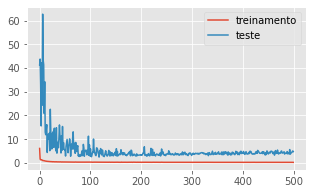

In [333]:
# Com a função de perda MSE 500 cópia
pyplot.plot(history.history['loss'], label='treinamento')
pyplot.plot(history.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

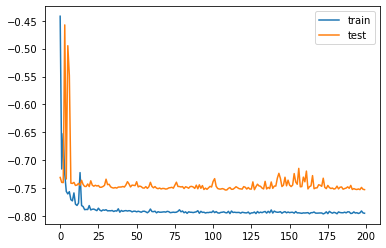

In [262]:
# Com a função de perda binary_crossentropy
pyplot.plot(history.history['loss'], label='treinamento')
pyplot.plot(history.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

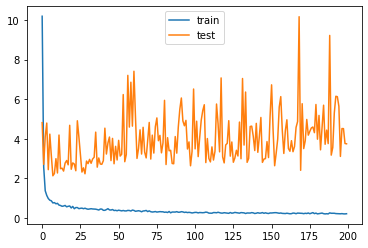

In [168]:
# Com a função de perda mse
pyplot.plot(history.history['loss'], label='treinamento')
pyplot.plot(history.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

In [334]:
# definir um modelo de codificador (sem o decodificador) 
encoder = Model(inputs=visible, outputs=bottleneck)

In [335]:
# salvo o encoder para usar depois
encoder.save('encoder_projeto_500.h5')

## Treinando um modelo Random Forest com a rede neural

In [336]:
# Carrega o modelo
from tensorflow.keras.models import load_model
encoder = load_model('encoder_projeto_500.h5')

In [337]:
# Treinando no encoder
X_train_encode = encoder.predict(X)
# encode the test data
X_test_encode = encoder.predict(X_teste)

In [338]:
#Define o modelo copia MSE
floresta = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
#Ajuste do modelo do conjunto de treinamento
floresta.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rf = floresta.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rf)
print(acc)

0.6223322256859991


## Calculando as métricas

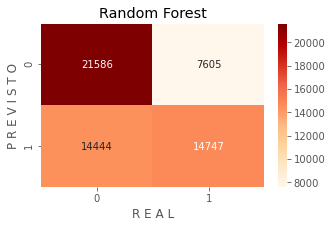

In [339]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [340]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf_rede = accuracy_score(y_teste,pred_rf)
especificidade_rf_rede = specificity_score(y_teste,pred_rf)
precisao_rf_rede = precision_score(y_teste,pred_rf)
recall_rf_rede = recall_score(y_teste,pred_rf)
f1Score_rf_rede = f1_score(y_teste,pred_rf)
curva_roc_escore_rf_rede = roc_auc_score(y_teste,pred_rf)
kappa_rf_rede = cohen_kappa_score(y_teste,pred_rf)
print(f'Acurácia:{round(acuracia_rf_rede,2)}')
print(f'Especificidade:{round(especificidade_rf_rede,2)}')
print(f'Precisão:{round(precisao_rl_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf_rede,2)}')
print(f'F1-Score:{round(f1Score_rf_rede,2)}')
print(f'Kappa:{round(kappa_rf_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf_rede,2)}')

Acurácia:0.62
Especificidade:0.74
Precisão:0.57
Recall ou Sensibilidade:0.51
F1-Score:0.57
Kappa:0.24
Curva ROC:0.62


## Treinando um modelo de Regressão Logística com a rede neural.

In [353]:
#Define o modelo
model = LogisticRegression(max_iter=2000)
#Ajuste do modelo do conjunto de treinamento
model.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rl = model.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rl)
print(acc)

0.5504265013188997


## Calculando as métricas

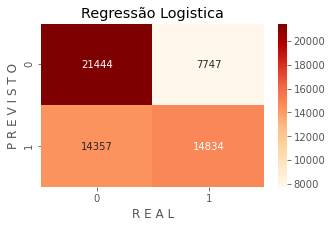

In [359]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logistica')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [360]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl_rede = accuracy_score(y_teste,pred_rl)
especificidade_rl_rede = specificity_score(y_teste,pred_rl)
precisao_rl_rede = precision_score(y_teste,pred_rl)
recall_rl_rede = recall_score(y_teste,pred_rl)
f1Score_rl_rede = f1_score(y_teste,pred_rl)
curva_roc_escore_rl_rede = roc_auc_score(y_teste,pred_rl)
kappa_rl_rede = cohen_kappa_score(y_teste,pred_rl)
print(f'Acurácia:{round(acuracia_rl_rede,2)}')
print(f'Especificidade:{round(especificidade_rl_rede,2)}')
print(f'Precisão:{round(precisao_rl_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl_rede,2)}')
print(f'F1-Score:{round(f1Score_rl_rede,2)}')
print(f'Kappa:{round(kappa_rl_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl_rede,2)}')

Acurácia:0.55
Especificidade:0.62
Precisão:0.56
Recall ou Sensibilidade:0.48
F1-Score:0.52
Kappa:0.1
Curva ROC:0.55


## Curva ROC: Wrapper X Filtro X Autoencoder

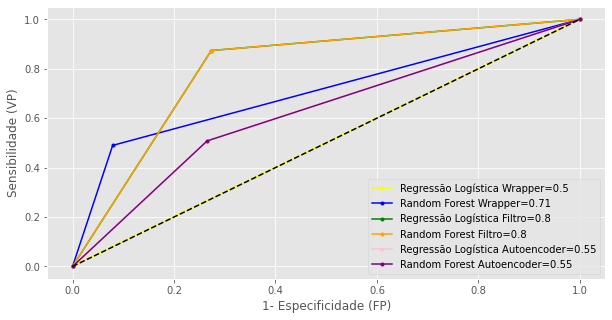

In [358]:
#Wrapper
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística Wrapper='+str(round(curva_roc_escore_rl,2)),color='yellow')
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest Wrapper='+str(round(curva_roc_escore_rf,2)),color="blue")

#Filtro
rfp_rl_f, rvp_rl_f,lim4 = roc_curve(y_teste,rl_pred_filtro)
rfp_rf_f, rvp_rf_f,lim5 = roc_curve(y_teste,rf_pred_filtro)
pyplot.plot(rfp_rl_f, rvp_rl_f, marker='.', label='Regressão Logística Filtro='+str(round(curva_roc_escore_rl_f,2)),color='green')
pyplot.plot(rfp_rf_f, rvp_rf_f, marker='.', label='Random Forest Filtro='+str(round(curva_roc_escore_rf_f,2)),color='orange')


#Autoencoder

rfp_rl_rede, rvp_rl_rede,lim7 = roc_curve(y_teste,pred_rl)
rfp_rl_rede, rvp_rl_rede,lim8 = roc_curve(y_teste,pred_rf)
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Regressão Logística Autoencoder='+str(round(curva_roc_escore_rl_rede,2)),color='pink')
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Random Forest Autoencoder='+str(round(curva_roc_escore_rl_rede,2)),color='purple')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade (FP)')
plt.ylabel('Sensibilidade (VP)')
plt.legend()
# Mostrando o gráfico
plt.rcParams["figure.figsize"] = (5, 3)
plt.show()

## Comparando as métricas

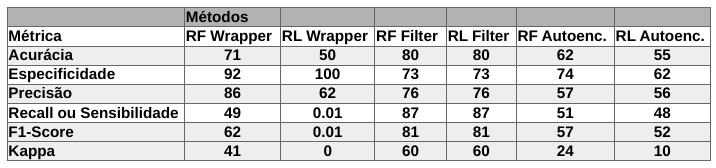

In [363]:
Image(filename='tab_metricas.png')

# Referências
### [1] MACHINELEARNINGMASTERY. Disponível em: https://machinelearningmastery.com/autoencoder-for-classification/.Acesso em 21/11/2021.
### [2] Wang, J., & Wang, L. (2020). Prediction and prioritization of autism-associated long non-coding RNAs using gene expression and sequence features. BMC Bioinformatics, 21(1), 1–15. https://doi.org/10.1186/s12859-020-03843-5.
### [3] MONOLITONIMBUS. Disponível em: https://www.monolitonimbus.com.br/modelo-sequencial-do-keras/. Acesso em: 21/11/2021.
### [4] KERAS. Disponível em: https://keras.io/api/losses/. Acesso em 21/11/2021.
### [5] KERAS-Optimizer. Disponível em: https://keras.io/guides/training_with_built_in_methods/. Acesso em 22/11/2021.